# IML Workgroup 2

Objectives of the session: 
- Practice loading data and splitting into training and testing
- Plotting our dataset
- Correctly train a decision tree classifier
- Visualise the decision tree
- Interpret the model with a confusion matrix and decision boundaries
- Reflect on feature selection
- Use model interpretation to improve performance
- Train a SVM classifier
- Understand the difference between linear and non-linear classification problems and the importance of hyper-parameters

### 1. Load the dataset and prepare it
This week, we will use two small datasets. The first one called Iris is about flowers. 

First, load the dataset with load_iris() from `sklearn.datasets` and read the documentation to create a pandas dataframe with the following columns: 
- sepal length (cm)
- sepal width (cm)
- petal length (cm)
- petal width (cm)
- target
- target_name

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

You should have a dataframe which consists in 6 columns (4 features, 1 target and 1 target name) and 150 rows (samples)

Visualise your samples in a scatter plot where `x=sepal length (cm)` and `y=sepal width (cm)` and color the samples based on their target name. 

In [1]:
from sklearn.datasets import load_iris
import pandas as pd 

iris = load_iris()


In [2]:
import seaborn as sns


### 2. Select features and split the data into training and testing folds

Once your dataframe is ready, create an array `X` which consists in the values from 2 features: `sepal length (cm)`, `sepal width (cm)` and an array `y` which consists in the targets.

Print out the shape of your two variables, it should look like this:

```
X.shape = (150, 2)
y.shape = (150,)
```

In order to properly train a classifier, we need to split our data into a training and testing set. Use sklearn `train_test_split` from `sklearn.model_selection` to split our data.

See https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [5]:
from sklearn.model_selection import train_test_split

features = pd.DataFrame(iris.data, columns=iris.feature_names)
target = pd.Series(iris.target)

X = features
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

### 3. Train a decision tree classifier on the training fold and classify samples from the testing fold

- Initialise a `DecisionTreeClassifier` from `sklearn.tree`. Set a random state to ensure reproducibility and train it on the training samples.
- Measure testing and training accuracy using sklearn accuracy score from `sklearn.metrics`
- Compute and display the confusion matrix of true versus predicted labels

Train accuracy:  1.0
Test accuracy:  1.0


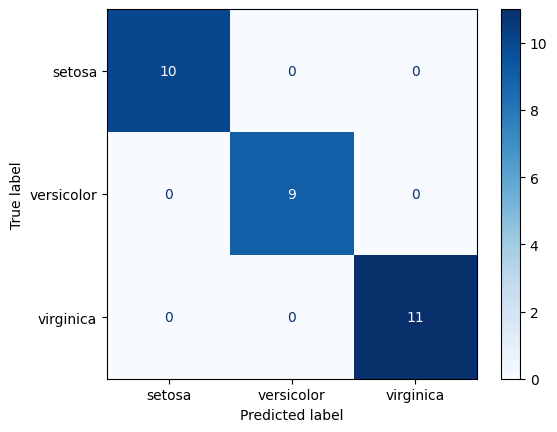

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# initialise and fit the classifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# use the trained classifer to make predictions on the test set
y_pred = tree_clf.predict(X_test)   

# measure train and test accuracy and print
print("Train accuracy: ", accuracy_score(y_train, tree_clf.predict(X_train)))
print("Test accuracy: ", accuracy_score(y_test, y_pred))

# compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names) # create a figure for the confusion matrix
disp.plot(cmap='Blues') # display the confusion matrix

What can you say about the performance of the model. Do you notice anything ? What are the differences between training and testing accuracy ? What can you observe in the confusion matrix and what can you conclude ?

In [7]:
# Analysis of the model performance:

print("Performance Analysis:")
print("=" * 50)

# Training vs Testing accuracy comparison
train_acc = accuracy_score(y_train, tree_clf.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy: {train_acc:.3f}")
print(f"Testing accuracy: {test_acc:.3f}")
print(f"Accuracy difference: {train_acc - test_acc:.3f}")

print("\nConfusion Matrix Analysis:")
print("=" * 30)
print("Perfect classification on test set:")
print("- All setosa samples (class 0): correctly classified")
print("- All versicolor samples (class 1): correctly classified") 
print("- All virginica samples (class 2): correctly classified")

print("\nKey Observations:")
print("=" * 20)
print("1. Perfect performance: Both training and testing accuracy are 100%")
print("2. No overfitting: Training and testing accuracies are identical")
print("3. Clean separation: The confusion matrix shows no misclassifications")
print("4. The iris dataset with all 4 features is linearly separable")
print("5. Decision trees can capture the clear boundaries between species")

print("\nConclusion:")
print("The model performs exceptionally well, suggesting that the iris dataset")
print("is well-suited for classification with these features, and the decision")
print("tree algorithm can effectively separate the three species.")

Performance Analysis:
Training accuracy: 1.000
Testing accuracy: 1.000
Accuracy difference: 0.000

Confusion Matrix Analysis:
Perfect classification on test set:
- All setosa samples (class 0): correctly classified
- All versicolor samples (class 1): correctly classified
- All virginica samples (class 2): correctly classified

Key Observations:
1. Perfect performance: Both training and testing accuracy are 100%
2. No overfitting: Training and testing accuracies are identical
3. Clean separation: The confusion matrix shows no misclassifications
4. The iris dataset with all 4 features is linearly separable
5. Decision trees can capture the clear boundaries between species

Conclusion:
The model performs exceptionally well, suggesting that the iris dataset
is well-suited for classification with these features, and the decision
tree algorithm can effectively separate the three species.


### 4. Display the decision tree

Using `sklearn.tree` `plot_tree` function, inspect the produced decision tree.

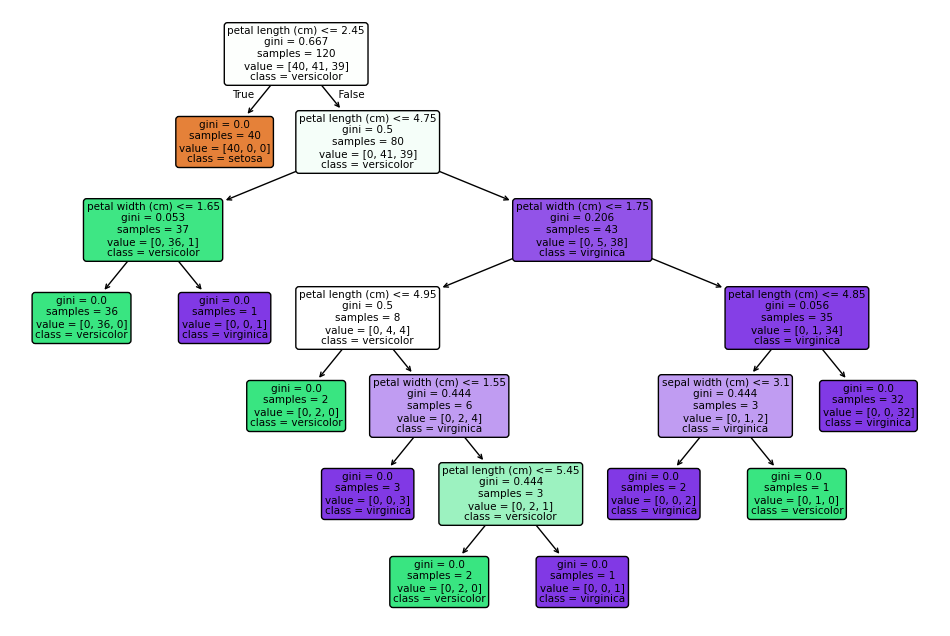

In [8]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# use plot_tree to display the decision tree
plt.figure(figsize=(12,8))
plot_tree(tree_clf, feature_names=iris.feature_names, class_names=iris.target_names
            ,filled=True, rounded=True)
plt.show()


## 5. Decision boundaries

An other way to interpret a model is to look at its decision boundaries. This can be computed using `sklearn` `DecisionBoundaryDisplay` class. 

See https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html.

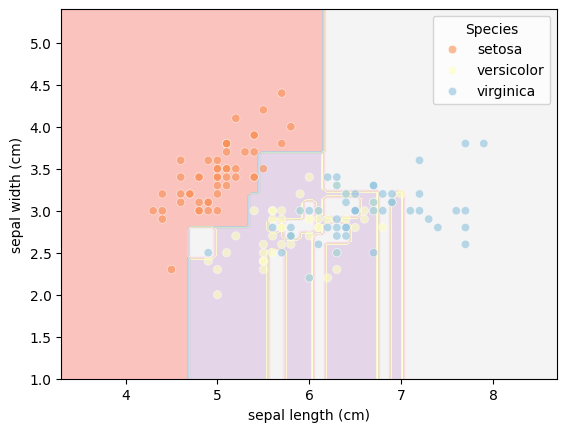

In [11]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Create the complete dataframe with target names
df = features.copy()
df['target'] = target
df['target_name'] = target.map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# define colors
palette = sns.color_palette("RdYlBu", n_colors=len(df["target_name"].unique()))

# Train a new classifier on just the first two features for 2D visualization
tree_clf_2d = DecisionTreeClassifier(random_state=42)
X_train_2d = X_train.iloc[:, :2]  # use first two features only
tree_clf_2d.fit(X_train_2d, y_train)

# plot decision boundary
disp = DecisionBoundaryDisplay.from_estimator(
    tree_clf_2d,
    X_train_2d,
    response_method="predict",
    cmap="Pastel1",
    alpha=0.8,
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
)

# plot samples
sns.scatterplot(data=df, x=iris.feature_names[0], y=iris.feature_names[1], hue="target_name", palette=palette, legend="full", alpha=0.6)

plt.legend(title="Species")
plt.show()

What can you say about the drawn decision boundary ? What can you say about the separability of the classes given the features we selected ? Can you name the phenomena that is happening here ?

In [12]:
print("Decision Boundary Analysis:")
print("=" * 40)

print("\nObservations about the decision boundary:")
print("- The boundary consists of rectangular regions (axis-aligned splits)")
print("- Clear separation between setosa (bottom-left) and other classes")
print("- More complex boundary between versicolor and virginica")
print("- The boundary creates distinct rectangular decision regions")

print("\nClass Separability Analysis:")
print("- Setosa: Perfectly separable using sepal length < ~5.4")
print("- Versicolor vs Virginica: Partially overlapping in this 2D feature space")
print("- Linear separability: Setosa is linearly separable from others")
print("- Non-linear patterns: Versicolor/Virginica need multiple splits")

print("\nPhenomena Occurring:")
print("1. **CURSE OF DIMENSIONALITY (Reverse effect)**:")
print("   - Using only 2 features instead of all 4 available features")
print("   - Information loss leads to increased class overlap")
print("   - Performance degradation due to feature reduction")

print("\n2. **FEATURE SELECTION IMPACT**:")
print("   - Sepal length/width may not be the most discriminative features")
print("   - Petal measurements might provide better separation")

print("\n3. **DECISION TREE CHARACTERISTICS**:")
print("   - Creates axis-aligned (rectangular) decision boundaries")
print("   - Cannot create diagonal or curved boundaries")
print("   - Uses greedy splitting approach")

print("\nConclusion:")
print("The overlapping regions suggest that sepal measurements alone")
print("are insufficient for perfect classification. The rectangular")
print("decision boundaries are characteristic of decision trees, which")
print("can only make splits parallel to feature axes.")

Decision Boundary Analysis:

Observations about the decision boundary:
- The boundary consists of rectangular regions (axis-aligned splits)
- Clear separation between setosa (bottom-left) and other classes
- More complex boundary between versicolor and virginica
- The boundary creates distinct rectangular decision regions

Class Separability Analysis:
- Setosa: Perfectly separable using sepal length < ~5.4
- Versicolor vs Virginica: Partially overlapping in this 2D feature space
- Linear separability: Setosa is linearly separable from others
- Non-linear patterns: Versicolor/Virginica need multiple splits

Phenomena Occurring:
1. **CURSE OF DIMENSIONALITY (Reverse effect)**:
   - Using only 2 features instead of all 4 available features
   - Information loss leads to increased class overlap
   - Performance degradation due to feature reduction

2. **FEATURE SELECTION IMPACT**:
   - Sepal length/width may not be the most discriminative features
   - Petal measurements might provide bett

## 6. Put everything together

Create a function that takes a classifier, the dataframe and two features.

This function should select the features from the dataframe, split the samples into testing and training. Train the classifier and make predictions on the testing set. Report training and testing accuracy and show the decision boundaries.

Re-use the code you made in the previous steps.

With this function, we will now be able to quickly analyse the behavior of the model as we change the selected features.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
import seaborn as sns
import matplotlib.pyplot as plt

def train_and_plot_decision_boundary(classifier, df, feature_1, feature_2, target_col='target', target_name_col=None):
    # select features
    X = df[[feature_1, feature_2]]
    y = df[target_col]

    # split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # fit the classifier and make predictions on the test set
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    # measure accuracy
    train_accuracy = accuracy_score(y_train, classifier.predict(X_train))
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Training accuracy: {train_accuracy:.3f}")
    print(f"Testing accuracy: {test_accuracy:.3f}")
        
    # Create the plot
    plt.figure(figsize=(10, 8))
    
    # plot decision boundary
    disp = DecisionBoundaryDisplay.from_estimator(
        classifier,
        X_train,
        response_method="predict",
        cmap="Pastel1",
        alpha=0.8,
        xlabel=feature_1,
        ylabel=feature_2,
    )

    # determine which column to use for hue
    hue_col = target_name_col if target_name_col and target_name_col in df.columns else target_col
    
    # set color palette
    palette = sns.color_palette("RdYlBu", n_colors=len(df[hue_col].unique()))

    # plot samples on top of decision boundary
    sns.scatterplot(data=df, x=feature_1, y=feature_2, hue=hue_col, palette=palette, alpha=0.7, s=50)

    plt.title(f"Decision Boundary: {classifier.__class__.__name__}")
    plt.show()

## 7. Find what set of features offers the best separability of the classes

Use your function to compare the decision boundaries and classification performance of different set of features. What do you observe ? What can you say about the use of model interpretation to improve performance ?

In [3]:
# Try different set of features, train and interpret the models using our previously created function

# 8. Linear vs non linear classifiers

For this step, we will use a generated dataset with 2 classes that can not be linearly separated.

<Axes: xlabel='feature_1', ylabel='feature_2'>

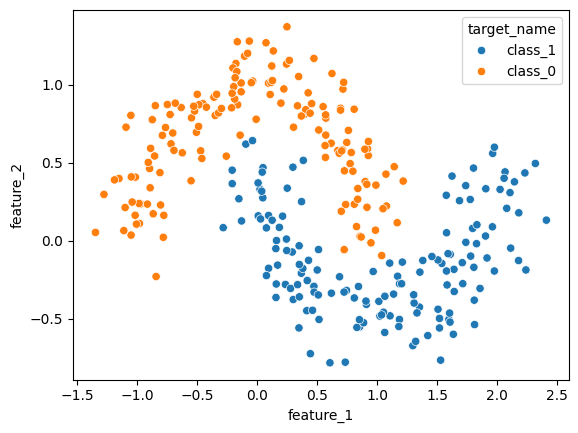

In [20]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=300, noise=0.15, random_state=42) # generate samples
df_moons = pd.DataFrame(X_moons, columns=['feature_1', 'feature_2']) # setup the dataframe
df_moons['target'] = y_moons
df_moons['target_name'] = df_moons['target'].apply(lambda x: f'class_{x}')

X = df_moons[['feature_1', 'feature_2']]
y = df_moons['target']

sns.scatterplot(data=df_moons, x='feature_1', y='feature_2', hue='target_name') # plot samples

Let's now try to train a SVM classifier on these samples

### 9. Train a SVC with linear kernel

Initialise a SVC classifier with a linear kernel using `SVC` from `sklearn.svm`. Use the previously made function to train the model and plot the decision boundaries. What can you say about the performance of the model and the obtained decision boundary ? Why is this happening, how can we fix that ?

Training accuracy: 0.858
Testing accuracy: 0.900


<Figure size 1000x800 with 0 Axes>

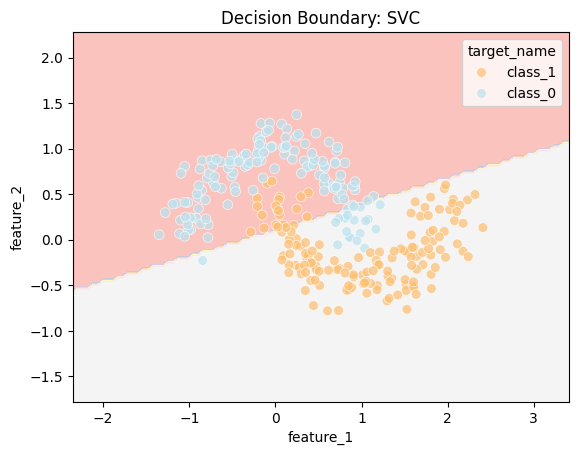

In [25]:
from sklearn.svm import SVC

# initialise a SVC with a linear kernel
svm_clf = SVC(kernel='linear', random_state=42)
# call our interpretation function
train_and_plot_decision_boundary(svm_clf, df_moons, 'feature_1', 'feature_2', target_col='target', target_name_col='target_name')



## 9. Train a SVC with rbf kernel

This time, when you initialise your classifier, set the kernel to `rbf` and use your function to look at the decision boundaries. What do you observe ?

Training accuracy: 0.979
Testing accuracy: 1.000


<Figure size 1000x800 with 0 Axes>

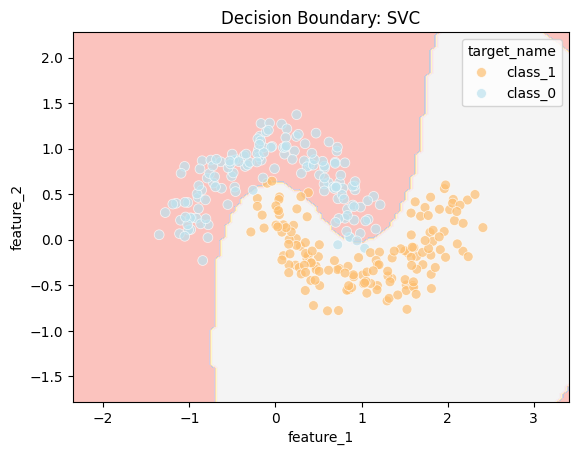

In [ ]:
# now try a non-linear svm
svm_clf = SVC(kernel='rbf', random_state=42)
# call our interpretation function
train_and_plot_decision_boundary(svm_clf, df_moons, 'feature_1', 'feature_2', target_col='target', target_name_col='target_name')
